In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
image_data = cv2.imread('./images/nasa_group_pic_noisy.jpg')
image_shape = np.shape(image_data)

In [10]:
def print_image(name,image):
    plt.figure(name)
    plt.title(name)
    if len(np.shape(image)) > 2:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(255-image,cmap='Greys')

image_shape: (768, 1018, 3)
rows/height: 768
cols/height: 1018
channels: 3


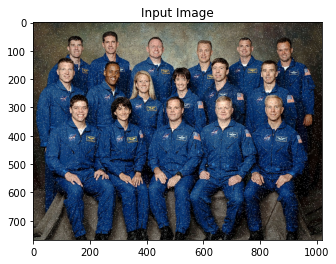

In [17]:
print('image_shape: {}'.format(image_shape))
print('rows/height: {}'.format(image_shape[0]))
print('cols/height: {}'.format(image_shape[1]))
print('channels: {}'.format(image_shape[2]))

print_image('Input Image', image_data)

# ROI Images

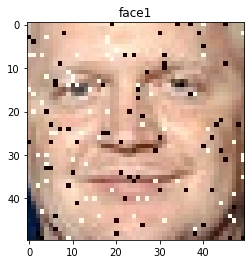

In [13]:
face_box1 = [647, 290, 50, 50]
x, y, width, height = face_box1

print_image('face1', image_data[y: y + height, x: x+width])

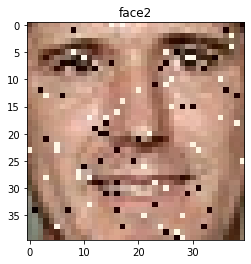

In [15]:
face_box2 = [253, 64, 40, 40]
x, y, width, height = face_box2

print_image('face2', image_data[y: y + height, x: x+width])

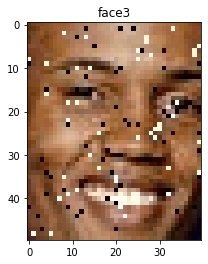

In [16]:
face_box3 = [260, 160, 40, 50]
x, y, width, height = face_box3

print_image('face3', image_data[y: y + height, x: x+width])

# Noise Removal

#### Blur Fiter

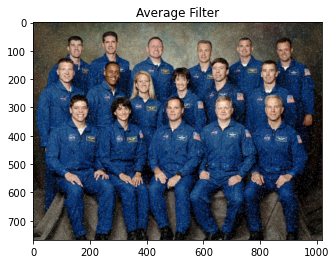

In [18]:
blur_image = cv2.blur(image_data, (3, 3))
print_image('Average Filter', blur_image)

#### Median Filter

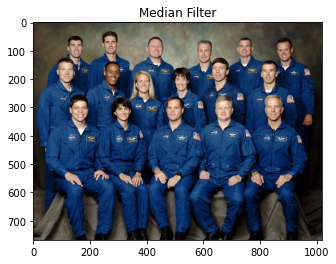

In [20]:
median_image = cv2.medianBlur(image_data, 3)
print_image('Median Filter', median_image)

#### Gaussian Filter

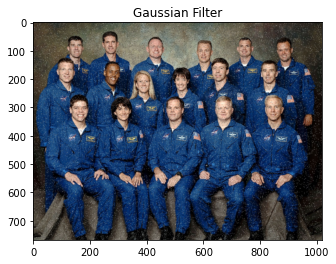

In [21]:
gaussian_image = cv2.GaussianBlur(image_data, (3, 3), 0)
print_image('Gaussian Filter', gaussian_image)

# Image Channel

Display Blue Channel

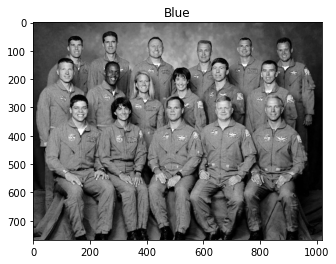

In [22]:
print_image('Blue', median_image[:, :, 0])

Display Green Channel

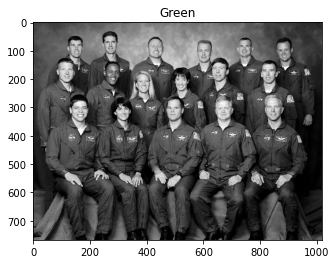

In [23]:
print_image('Green', median_image[:, :, 1])

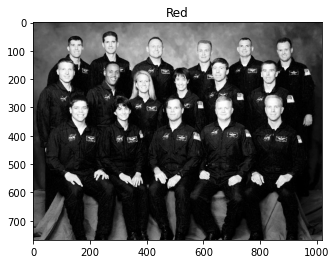

In [24]:
print_image('Red', median_image[:, :, 2])

# Drawing Image Histogram

In [25]:
def display_histogram(image):
    # split image to different channel
    bgr_planes = cv2.split(image)
    
    # set parameters
    hist_size = 256
    hist_range = (0, 256)
    
    # calculate histogram
    b_hist = cv2.calcHist(bgr_planes, [0], None, [hist_size], hist_range)
    g_hist = cv2.calcHist(bgr_planes, [1], None, [hist_size], hist_range)
    r_hist = cv2.calcHist(bgr_planes, [2], None, [hist_size], hist_range)
    
    # plot histogram
    plt.plot(b_hist, 'b')
    plt.plot(g_hist, 'g')
    plt.plot(r_hist, 'r')
    plt.ylabel('Intensity')
    plt.title('Image Histogram')
    plt.show()

Image Histogram

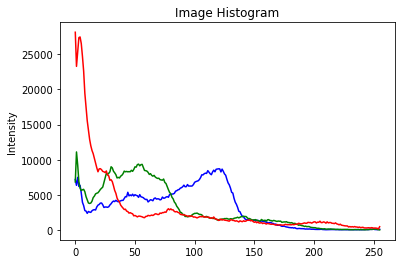

In [26]:
display_histogram(median_image)

face histogram

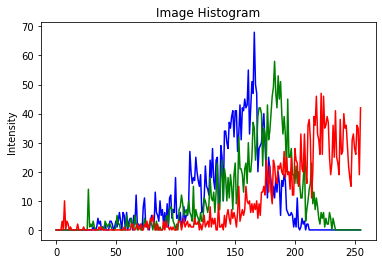

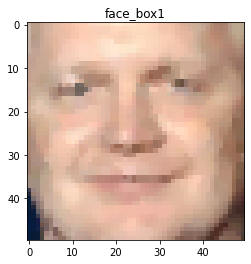

In [28]:
x, y, width, height = face_box1
face_roi = median_image[y: y + height, x: x + width]

display_histogram(face_roi)
print_image('face_box1', face_roi)

# Threshold

Extract skin color from image

In [29]:
input_image_data = median_image

In [30]:
lower = np.array([120, 120, 200], dtype = 'uint8')
upper = np.array([200, 200, 255], dtype = 'uint8')

In [31]:
skin_mask = cv2.inRange(input_image_data, lower, upper)

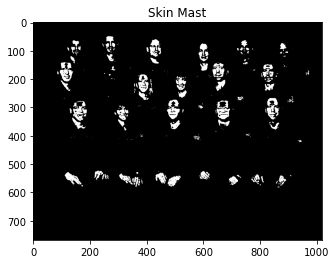

In [32]:
print_image('Skin Mast', skin_mask)

# Color Conversion

Converts image from BGR to HSV color space

In [34]:
hsv_image = cv2.cvtColor(median_image, cv2.COLOR_BGR2HSV)

Display Hue

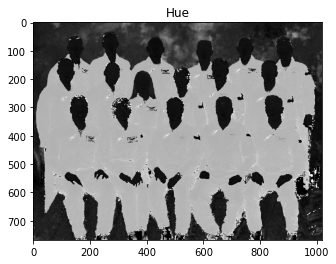

In [35]:
print_image('Hue', hsv_image[:, :, 0])

Display Saturation

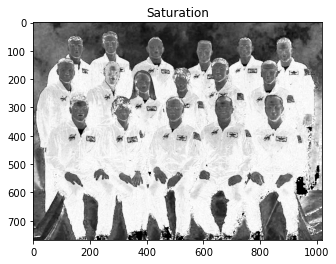

In [36]:
print_image('Saturation', hsv_image[:, :, 1])

Display Intensity

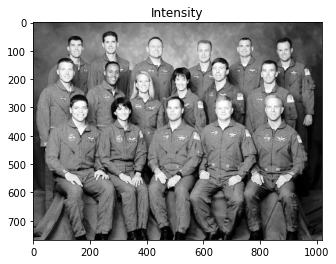

In [37]:
print_image('Intensity', hsv_image[:, :, 2])

Face Histogram(HSV Space)

In [38]:
x,y,width,height = face_box1

In [42]:
face_roi = hsv_image[y:y+height,x:x+width]

In [40]:
display_histogram(face_roi)

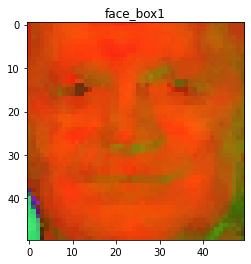

In [43]:
print_image('face_box1',face_roi)

# Blob Analysis

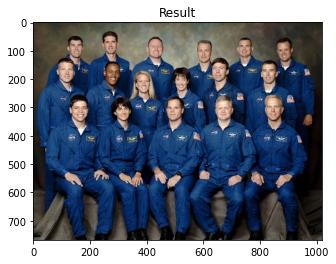

In [45]:
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# copy image for display
display = np.copy(median_image)

# Draw rectangle of faces
for contour in contours:
    
    box = cv2.boundingRect(contour)
    x,y,width,height = box
        
    p1 = (x,y)
    p2 = (x + width,y + height)
    cv2.rectangle(display, p1, p2,(0,0,255),3)
    

print_image('Result',display)

## Blob Analysis (2)

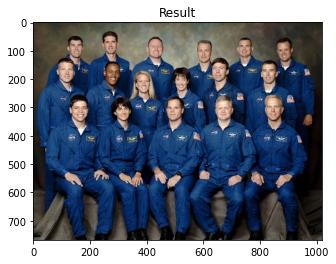

In [48]:
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# copy image for display
display = np.copy(median_image)

# Draw rectangle of faces
for contour in contours:
    
    box = cv2.boundingRect(contour)
    x,y,width,height = box
    
    
    # Face condition
    if width * 1.25 > height:
        continue
    if height < 50:
        continue
    
    p1 = (x,y)
    p2 = (x + width,y + height)
    cv2.rectangle(display, p1, p2,(0,0,255),3)
    

print_image('Result',display)